In [82]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('sales_eda_data.csv')

In [83]:
data.info()
print(data.head())
print(data.isna().sum().sort_values(ascending=False))
print(data.duplicated().sum())
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   Product_ID            1000 non-null   int64  
 2   Sale_Date             1000 non-null   object 
 3   Sales_Rep             1000 non-null   object 
 4   Region                1000 non-null   object 
 5   Sales_Amount          1000 non-null   float64
 6   Quantity_Sold         1000 non-null   int64  
 7   Product_Category      1000 non-null   object 
 8   Unit_Cost             1000 non-null   float64
 9   Unit_Price            1000 non-null   float64
 10  Customer_Type         1000 non-null   object 
 11  Discount              1000 non-null   float64
 12  Payment_Method        1000 non-null   object 
 13  Sales_Channel         1000 non-null   object 
 14  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(3

Unnamed: 0                int64
Product_ID                int64
Sale_Date                object
Sales_Rep                object
Region                   object
Sales_Amount            float64
Quantity_Sold             int64
Product_Category         object
Unit_Cost               float64
Unit_Price              float64
Customer_Type            object
Discount                float64
Payment_Method           object
Sales_Channel            object
Region_and_Sales_Rep     object
dtype: object

In [84]:
data['Sale_Date'] = pd.to_datetime(data['Sale_Date'])
data['Month'] = data['Sale_Date'].dt.month
data['Year'] = data['Sale_Date'].dt.year
data['Quarter'] = data['Sale_Date'].dt.quarter
data['Product_ID'] = data['Product_ID'].astype('object')
data = data.rename(columns={'Region': 'State'})

In [85]:
product_performance = data.groupby('Product_ID')['Sales_Amount'].sum().sort_values(ascending = False).reset_index()
state_product_performance = data.groupby(['State', 'Product_ID'])['Sales_Amount'].sum().sort_values(ascending = False). reset_index()

top_10_product = product_performance.head(10)
bottom_10_product = product_performance.tail(10)
top_10_state_products = state_product_performance.head(20)
bottom_10_state_products = state_product_performance.tail(10)

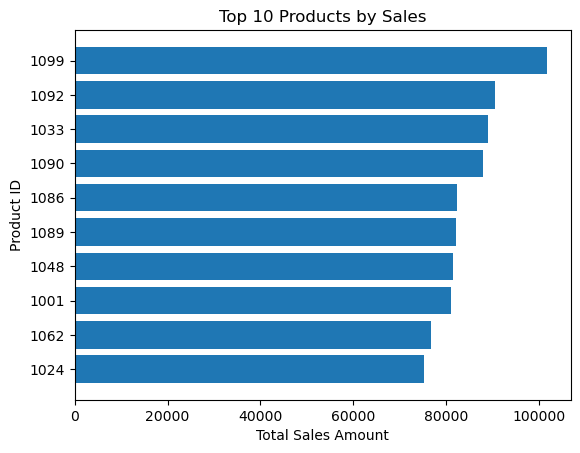

<Figure size 640x480 with 0 Axes>

In [86]:
plt.barh(top_10_product['Product_ID'].astype('str'), top_10_product['Sales_Amount'])
plt.xlabel('Total Sales Amount')
plt.ylabel('Product ID')
plt.title('Top 10 Products by Sales')
plt.gca().invert_yaxis()
plt.show()
plt.clf()
#This graph shows us the top 10 best-performing products across all our stores. We can see product 1099 with the best performance, significantly ahead of the other top performing products.

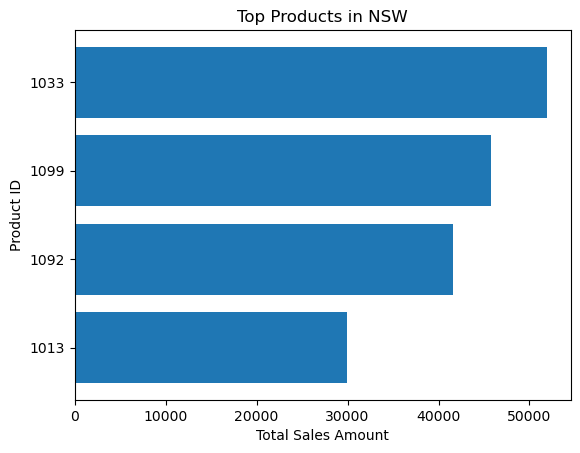

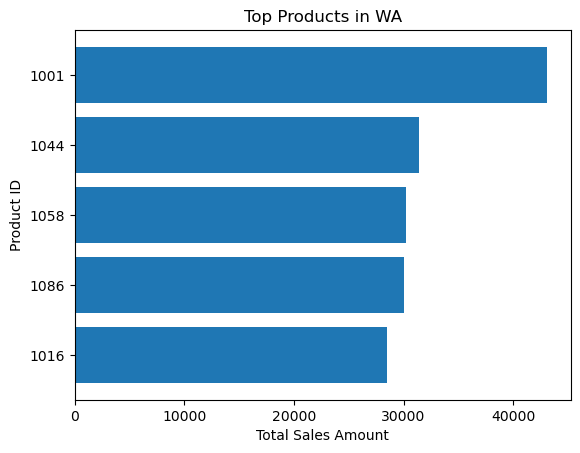

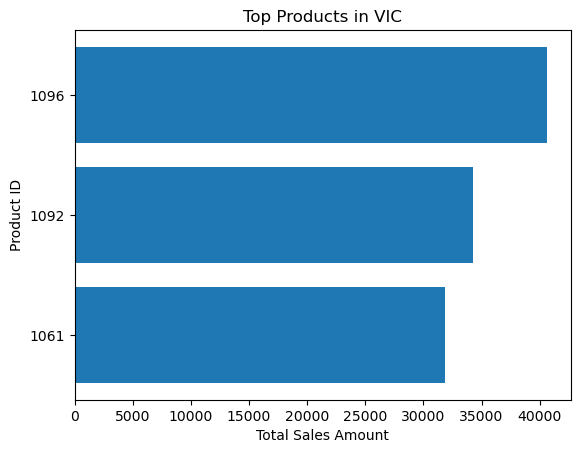

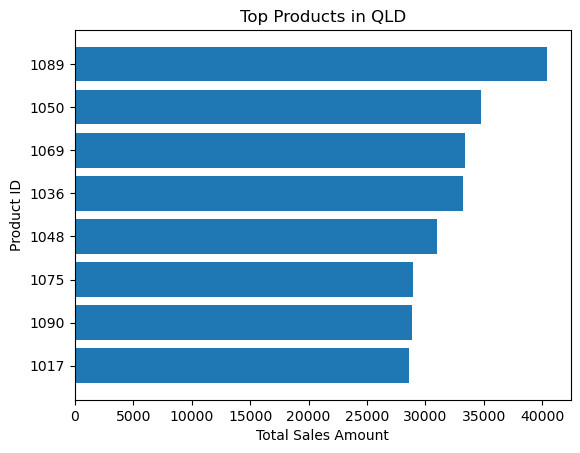

In [87]:
for state in top_10_state_products['State'].unique():
    subset = top_10_state_products[top_10_state_products['State'] == state]
    plt.barh(subset['Product_ID'].astype(str),subset['Sales_Amount'])
    plt.title(f"Top Products in {state}")
    plt.xlabel("Total Sales Amount")
    plt.ylabel("Product ID")
    plt.gca().invert_yaxis()
    plt.show()

# This graph shows us our top-performing products by state. We can see there are several different product id's per state, which could be a result of different product categories being popular across different states. This is beneificial for the business as we have a number of products performing well across different states.



  State  Sales_Amount
0   QLD    1369612.51
1   NSW    1259792.93
2    WA    1235608.93
3   VIC    1154250.86


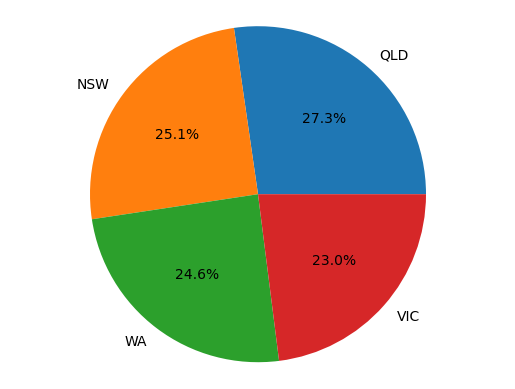

<Figure size 640x480 with 0 Axes>

In [88]:
state_performance = data.groupby('State')['Sales_Amount'].sum().sort_values(ascending = False).reset_index()
print(state_performance)
plt.pie(state_performance['Sales_Amount'], labels = state_performance['State'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()
plt.clf()
# From our pie chart, we can see that performance across the states is fairly even.

   State Product_Category  Sales_Amount
0    QLD        Furniture     394983.35
1    QLD         Clothing     372977.22
2    NSW         Clothing     356670.40
3    QLD      Electronics     342666.29
4    NSW             Food     325864.87
5     WA             Food     315735.51
6     WA         Clothing     314309.00
7     WA      Electronics     304067.97
8    NSW      Electronics     303101.42
9     WA        Furniture     301496.45
10   VIC             Food     301187.51
11   VIC      Electronics     293663.96
12   VIC        Furniture     289881.65
13   NSW        Furniture     274156.24
14   VIC         Clothing     269517.74
15   QLD             Food     258985.65


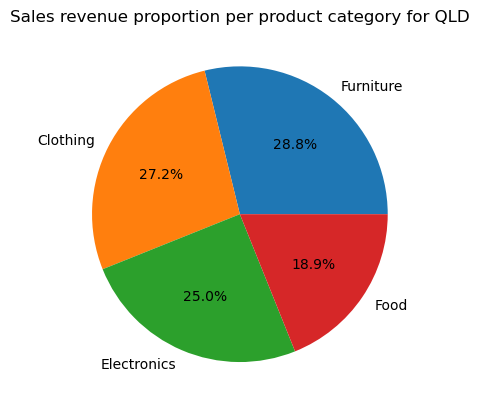

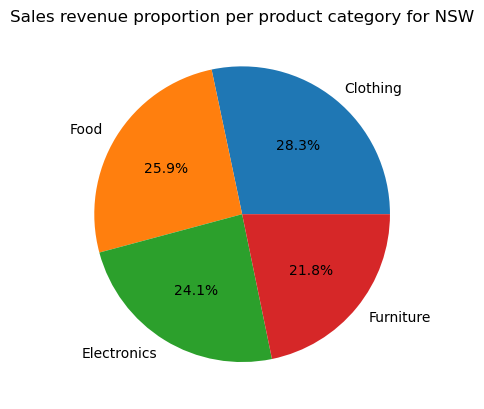

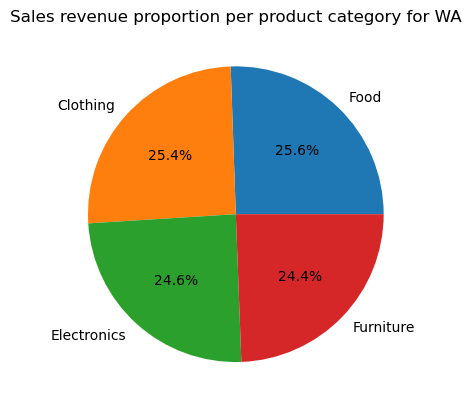

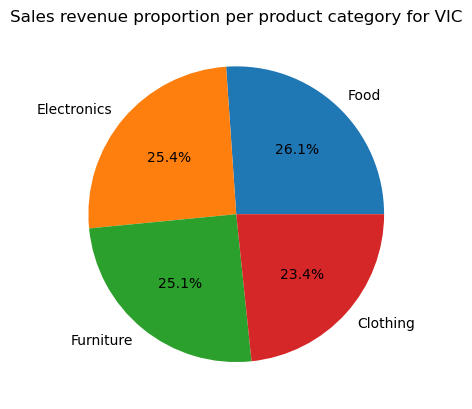

  Product_Category  Sales_Amount
0         Clothing     372977.22
1      Electronics     342666.29
2             Food     258985.65
3        Furniture     394983.35


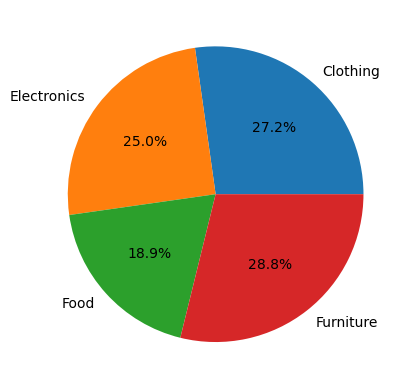

<Figure size 640x480 with 0 Axes>

In [89]:
product_category_by_state = data.groupby(['State', 'Product_Category'])['Sales_Amount'].sum().sort_values(ascending = False).reset_index()
print(product_category_by_state)

for state in product_category_by_state['State'].unique():
    subset = product_category_by_state[product_category_by_state['State'] == state]
    plt.pie(subset['Sales_Amount'], labels = subset['Product_Category'], autopct='%1.1f%%')
    plt.title(f'Sales revenue proportion per product category for {state}')
    plt.show()

# We can see a fairly even spread of the proportion of revenue generated through each product category across the 4 states. Food in QLD should be investigated as to why it is lower compared to other states and other categories within QLD. Furniture in NSW should also be looked at, as it is slightly lower compared to other states.           


Food_qld = data[data['State'] == 'QLD']
Food_qld = Food_qld.groupby('Product_Category')['Sales_Amount'].sum().reset_index()

print(Food_qld)

plt.pie(Food_qld['Sales_Amount'], labels = Food_qld['Product_Category'], autopct='%1.1f%%')
plt.show()
plt.clf()

# The lower proportion of transactions at 18.9% suggest that lower Food revenue is driven by lower volume sold. We have no supporting data to further investigate this, but aspects like inventory, change in promotional activities, changes in climate and change in consumer behaviour could further be investigated to get to the bottom of this.



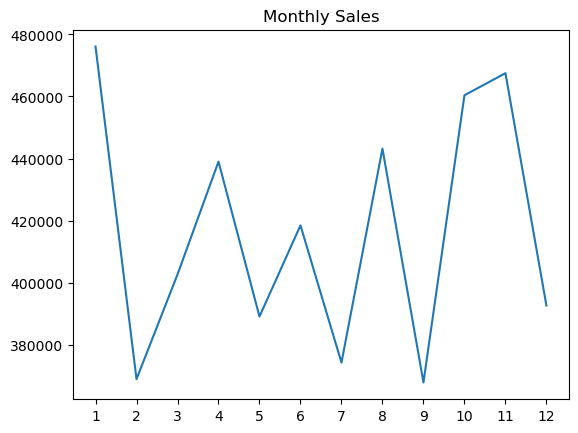

    Month  Sales_Amount
0       1     476092.36
1       2     368919.36
2       3     402638.77
3       4     438992.61
4       5     389078.76
5       6     418458.34
6       7     374242.88
7       8     443171.28
8       9     367837.60
9      10     460378.78
10     11     467482.90
11     12     392643.58


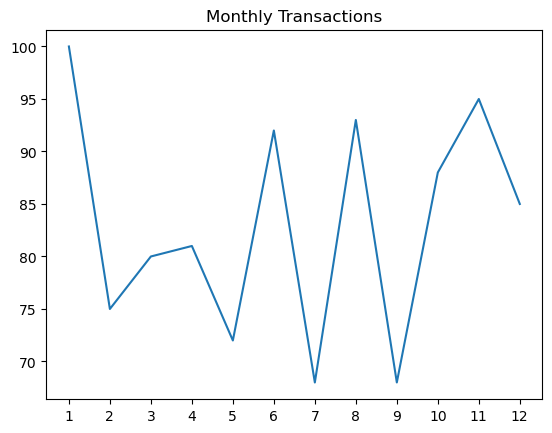

    Month  Sales_Amount
0       1     476092.36
1       2     368919.36
2       3     402638.77
3       4     438992.61
4       5     389078.76
5       6     418458.34
6       7     374242.88
7       8     443171.28
8       9     367837.60
9      10     460378.78
10     11     467482.90
11     12     392643.58


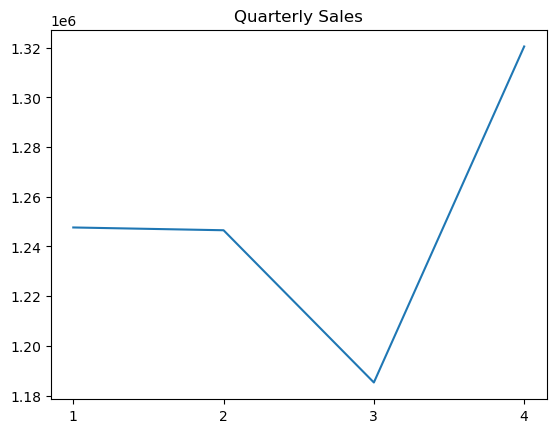

   Quarter  Sales_Amount
0        1    1247650.49
1        2    1246529.71
2        3    1185251.76
3        4    1320505.26


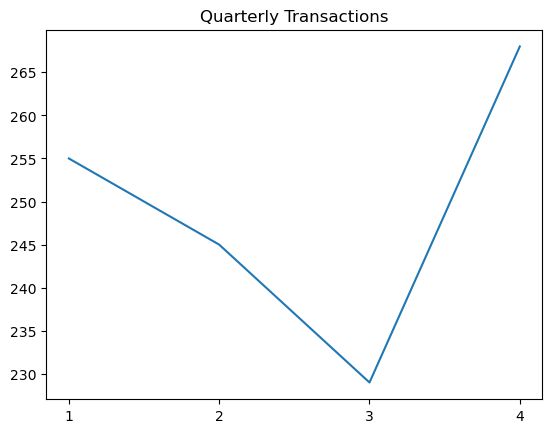

   Quarter  Sales_Amount
0        1    1247650.49
1        2    1246529.71
2        3    1185251.76
3        4    1320505.26


<Figure size 640x480 with 0 Axes>

In [90]:
# 2023 Sales analysis
sales_2023 = data[data['Year'] == 2023]

monthly_sales = sales_2023.groupby('Month')['Sales_Amount'].sum().reset_index().sort_values('Month')
plt.plot(monthly_sales['Month'], monthly_sales['Sales_Amount'])
plt.title('Monthly Sales')
plt.xticks(range(1,13))
plt.show()
plt.clf()
print(monthly_sales)

monthly_transactions = sales_2023.groupby('Month')['Sales_Amount'].count().reset_index().sort_values('Month')
plt.plot(monthly_transactions['Month'], monthly_transactions['Sales_Amount'])
plt.title('Monthly Transactions')
plt.xticks(range(1,13))
plt.show()
plt.clf()
print(monthly_sales)


quarterly_sales = sales_2023.groupby('Quarter')['Sales_Amount'].sum().reset_index().sort_values('Quarter')
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Sales_Amount'])
plt.title('Quarterly Sales')
plt.xticks([1, 2, 3, 4])
plt.show()
plt.clf()
print(quarterly_sales)

quarterly_transactions = sales_2023.groupby('Quarter')['Sales_Amount'].count().reset_index().sort_values('Quarter')
plt.plot(quarterly_transactions['Quarter'], quarterly_transactions['Sales_Amount'])
plt.title('Quarterly Transactions')
plt.xticks([1, 2, 3, 4])
plt.show()
plt.clf()
print(quarterly_sales)

# Monthly and quarterly sales are highly variable. There is no steady trend in sales, either monthly or quarterly. January, October, and November were our best-performing months. Monthly sales projections could produce uncertain results with such variability. Factors such as seasonality, promotional activities or external factors should be investigated.
# The variability in transaction count across all months in 2023 can suggest the variability in revenue for each month. The month of April should be looked at as the proportion of revenue per transaction is high, we should look into which promotions the business ran, as it clearly spiked our revenue. However, we also need to consider why transactions were so low and if that is a result of lower foot traffic.

# We see a large increase in sales from quarter 3 to 4. The quarterly transaction count supports the increase we see in revenue from quarter 3 to 4. Total transactions in quarter 4 of 2023 were at an all-time high. It suggests that the increase in revenue was more volume-based than price-driven. This could be influenced by factors previously stated, as well as product relevance with the seasonal climate.



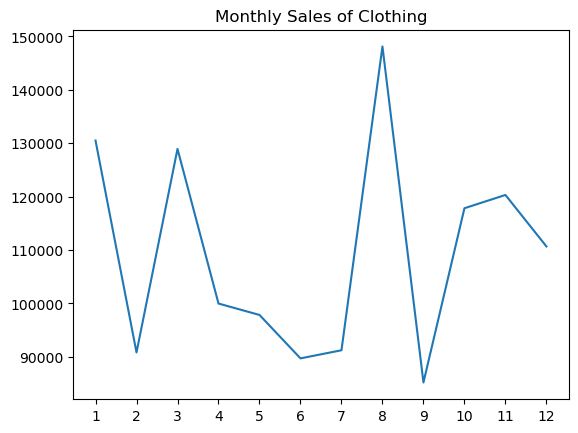

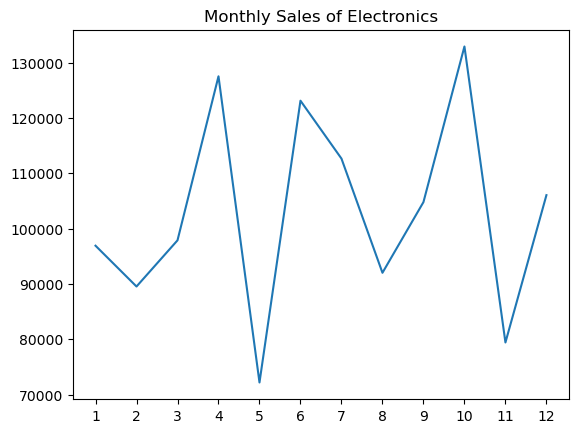

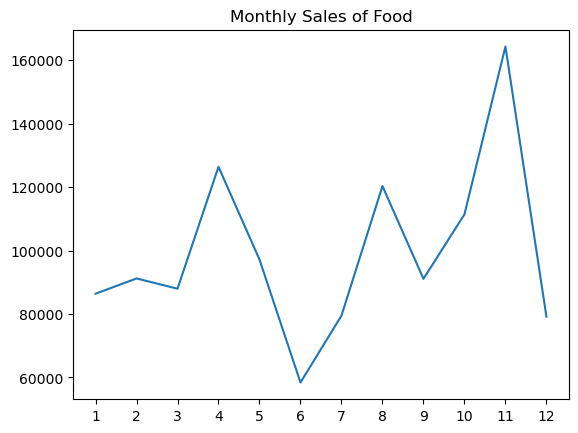

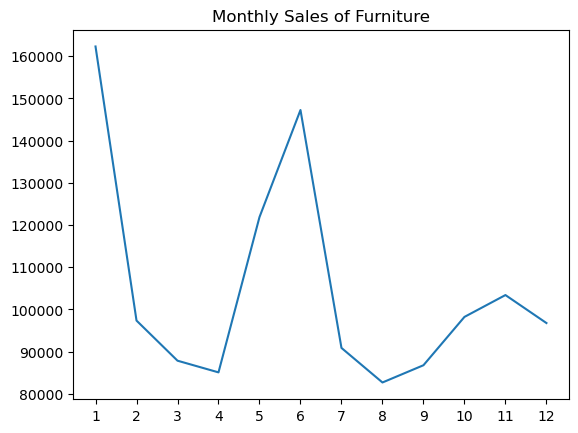

<Figure size 640x480 with 0 Axes>

In [91]:
category_sales_monthly = sales_2023.groupby(['Month','Product_Category'])['Sales_Amount'].sum().reset_index().sort_values('Month')

for category in category_sales_monthly['Product_Category'].unique():
    subset = category_sales_monthly[category_sales_monthly['Product_Category'] == category]
    plt.plot(subset['Month'], subset['Sales_Amount'])
    plt.title(f'Monthly Sales of {category}')
    plt.xticks(range(1,13))
    plt.show()
    plt.clf()

# Revenue generated by the 4 product categories is highly variable, we see each category performing in separate 2-3 month periods. This separation suggests the influence of seasonality on revenue from different categories, this could also be a result of different promotional programs for each category.


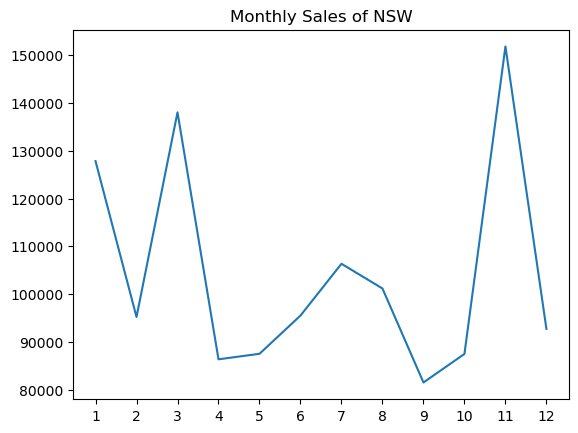

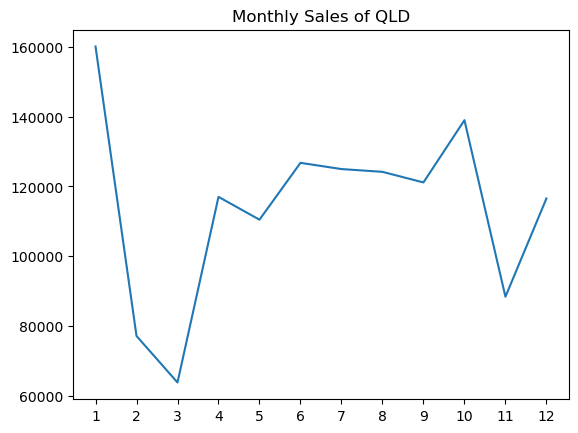

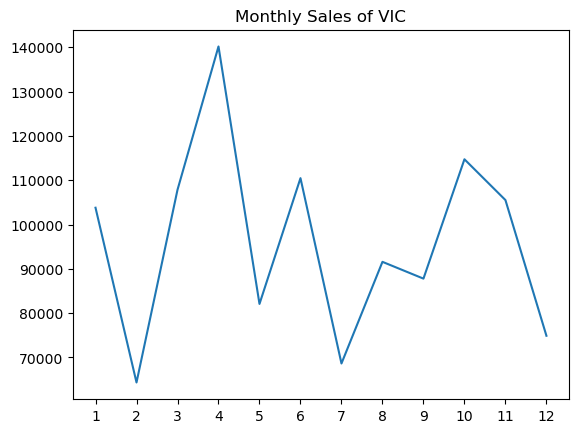

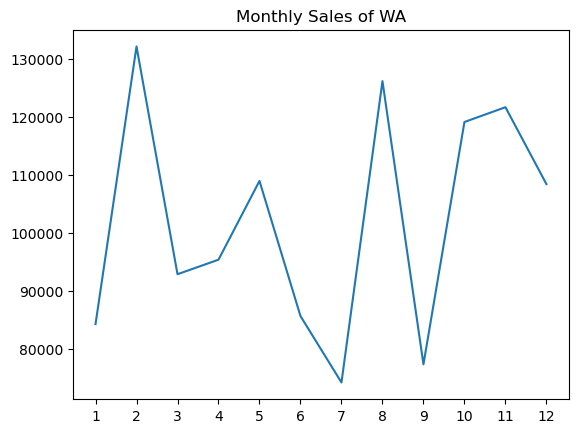

<Figure size 640x480 with 0 Axes>

In [92]:
state_sales_monthly = sales_2023.groupby(['Month','State'])['Sales_Amount'].sum().reset_index().sort_values('Month')

for state in state_sales_monthly['State'].unique():
    subset = state_sales_monthly[state_sales_monthly['State'] == state]
    plt.plot(subset['Month'], subset['Sales_Amount'])
    plt.title(f'Monthly Sales of {state}')
    plt.xticks(range(1,13))
    plt.show()
    plt.clf()

# Monthly sales across our operational states do not show a steady growth or decline over time. Considering our previous observations and insights, our data suggest there might be certain factors impacting the variability of our data. 



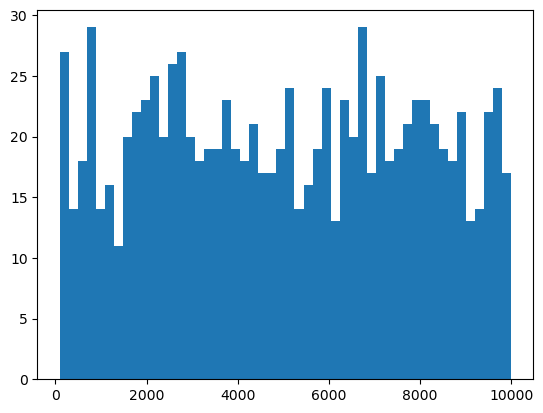

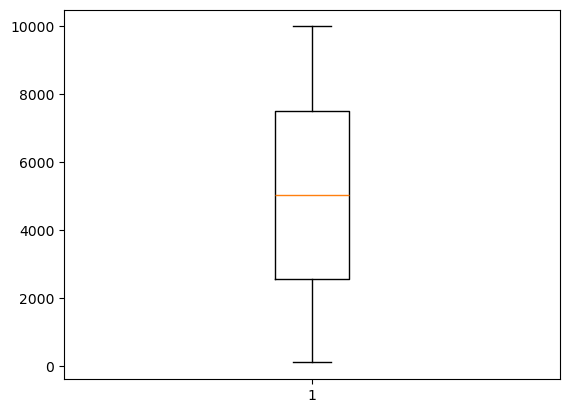

<Figure size 640x480 with 0 Axes>

In [93]:
plt.hist(data['Sales_Amount'], bins=50)
plt.show()
plt.clf()
plt.boxplot(data['Sales_Amount'])
plt.show()
plt.clf()

In [94]:
print(data['Sales_Amount'].mean())
print(data['Sales_Amount'].median())
print(data['Sales_Amount'].std())
data = data.drop(columns=['Unnamed: 0'])
print(data.head())
data.to_csv('Final_sales_eda.csv', index=False)


# Looking at the histogram and boxplot it is clear that there is no clear skew on our Sales Amount data, the histogram shows no clear tail on either end of the graph, and we can suggest a symmetric distribution. A similar number for the mean and median also confirms that there is no strong skew.
# The data has a high standard deviation, this does result to high variability. Considering the size and distribution of our dataset we will still be able to make stable predictions based on this data.

5019.265229999999
5019.3
2846.7901256682326
  Product_ID  Sale_Date Sales_Rep State  Sales_Amount  Quantity_Sold  \
0       1052 2023-02-03       Bob   QLD       5053.97             18   
1       1093 2023-04-21       Bob    WA       4384.02             17   
2       1015 2023-09-21     David   VIC       4631.23             30   
3       1072 2023-08-24       Bob   VIC       2167.94             39   
4       1061 2023-03-24   Charlie   NSW       3750.20             13   

  Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
0        Furniture     152.75      267.22     Returning      0.09   
1        Furniture    3816.39     4209.44     Returning      0.11   
2             Food     261.56      371.40     Returning      0.20   
3         Clothing    4330.03     4467.75           New      0.02   
4      Electronics     637.37      692.71           New      0.08   

  Payment_Method Sales_Channel Region_and_Sales_Rep  Month  Year  Quarter  
0           Cash        Online  